<a href="https://colab.research.google.com/github/NihilisticMotif/CheCheConjecture/blob/main/ML_Stats/GradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Python Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

#Partial Derivative

$x\in\mathbb{R^{n\times m}}\land J(x)\in\mathbb{R}\implies\frac{\partial J}{\partial x}\in\mathbb{R^{n\times m}}$

Reference: https://youtu.be/AdV5w8CY3pw?si=_X108FGAM0Crnzvm

#Gradient Descent, Epoch and Batch

###Introduction

**What is the Gradient Descent?**

Gradient Descent is the optimization algorithm. It is used for finding the lowest point of the function.

$x:=x-a\frac{\partial J}{\partial x}$

* $\frac{\partial J}{\partial x}=$ derivative of the target function $J$ with respect to variable $x$
* $a=$ learning rate

**Note**

If the $a$ is too much, the value $x$ will be diverge

If the $a$ is too little, the value $x$ will not change

If the $a$ is balance, the value $x$ will approach the global minimum value (the lowest point).

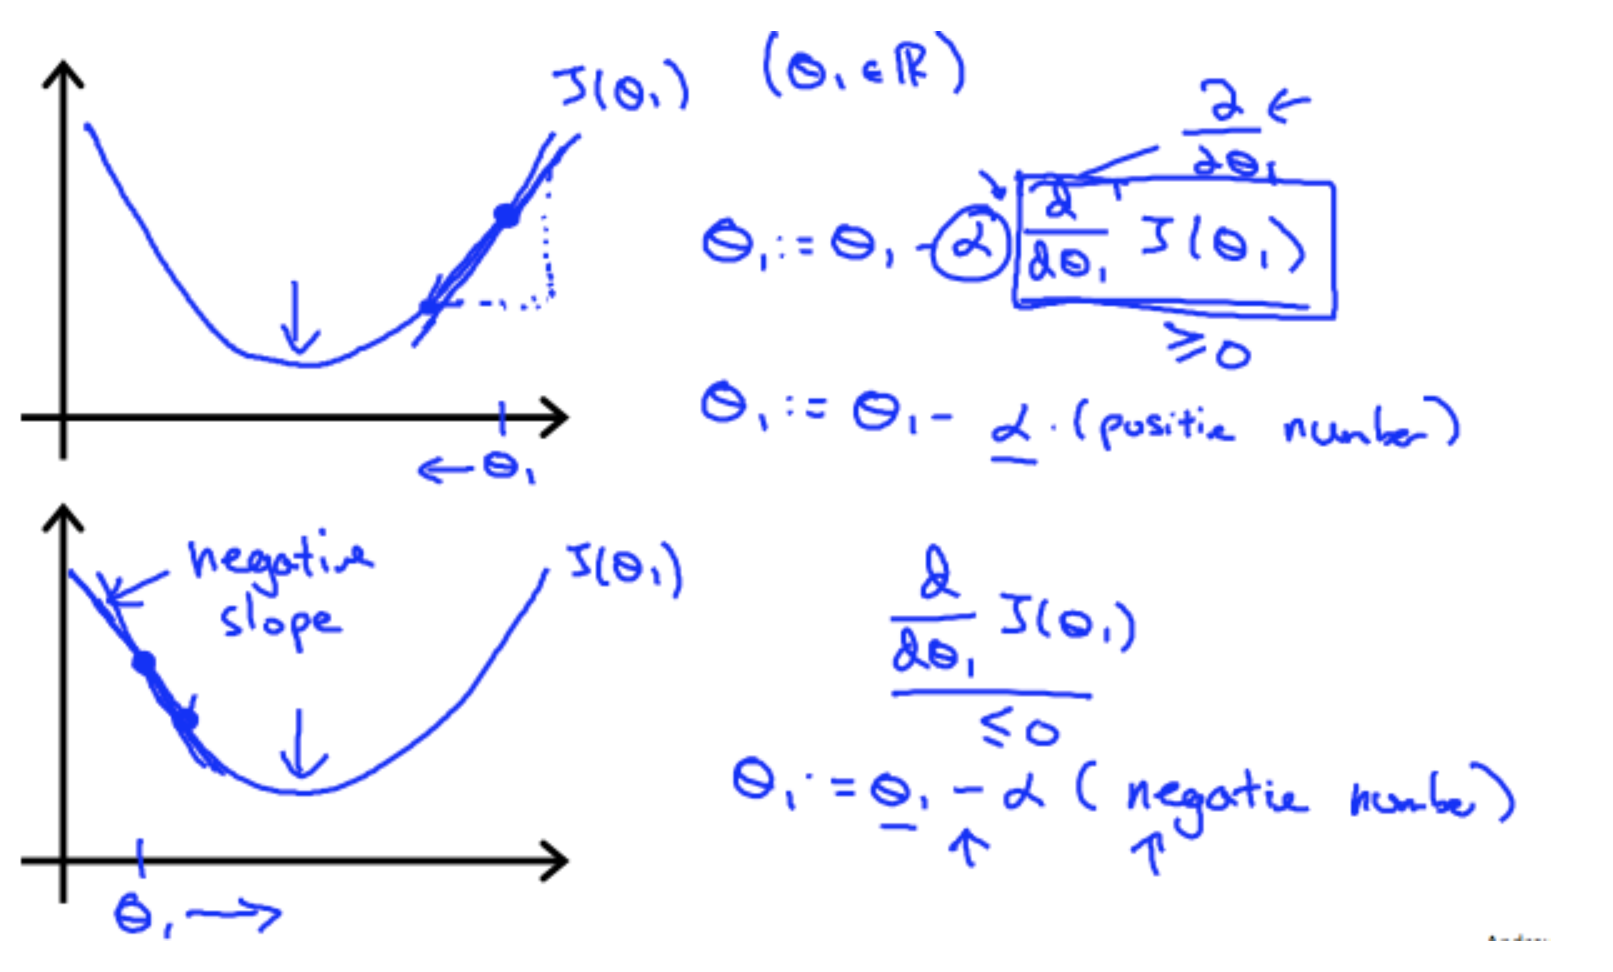

**This picture is provided by Andrew Ng.**

###Application of Gradient Descent

The main application of gradient descent is to train the Machine Learning Model to predict data more accurate with fewer error score (Loss function score).

###Implementation

In [ ]:
def GD(x,a,epoch,diff,func):
  History=[]
  for i in range(epoch):
    x=x-a*diff(x)
    row = pd.DataFrame({
              'epoch': [i],
              'Loss': [func(x)],
              })
    History.append(row)
  History = pd.concat(History)
  return [x,History]

In [ ]:
def Loss(x):
  return (x**4)/4-x**2-x

def DiffLoss(x):
  return x**3-2*x-1

In [ ]:
GDD=GD(
    np.exp(1), # x
    0.1,
    5,
    DiffLoss,
    Loss
    )
MinX=GDD[0]
History=GDD[1]

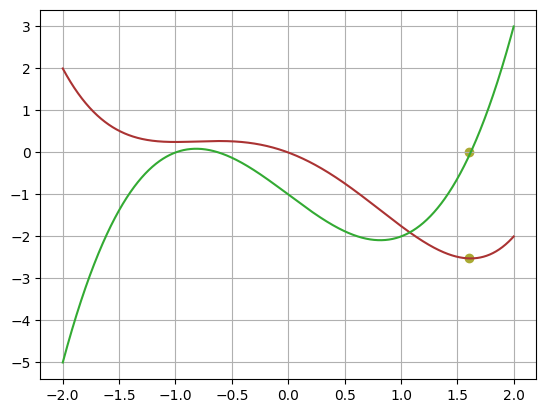

In [ ]:
start=-2
stop=2
step=2000
X=np.linspace(start, stop, step)

a=0.23
b=-0.31
c=-np.exp(1.5)

# Original Function = Red
plt.plot(X,(X**4)/4-X**2-X,color='#AA3333')

# First Derivative = Green
plt.plot(X,X**3-2*X-(X/X),color='#33AA33')

# Second Derivative = Blue
#plt.plot(X,3*X**2-2*(X/X),color='#3333AA')

plt.scatter(MinX,0,color='#AAAA33')
plt.scatter(MinX,Loss(MinX),color='#AAAA33')
plt.grid()

#Gradient Descent vs Newton Method

Gradient Descent is better than Newton Method in most case because
1. Gradient Descent is more reliable for finding the global minimum point
2. Gradient Descent only require first order derivative of the target function, while the Newton Method require first and second ordered derivative of the target function.

However, the Newton Method is better than Gradient Descent for
1. Finding the root of a number e.g. $\sqrt{2},3^{\frac{2}{3}}$ etc.
2. Optimized the target function that have second order derivative and have only one lowest point (the point where the derivative of the target function is equal to $0$)

Reference:
* https://stats.stackexchange.com/questions/253632/why-is-newtons-method-not-widely-used-in-machine-learning